<a href="https://colab.research.google.com/github/dgoppenheimer/Molecular-Dynamics/blob/main/Plotly_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# see if plotly is already installed in colab
import plotly
plotly.__version__

'5.5.0'

Yes, plotly is already installed.

See [IV_Plotly](https://colab.research.google.com/github/pytrain/iViz/blob/master/IV_Plotly.ipynb#scrollTo=2ljXzS-h9Gym) for most of the code, below.

In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

config = dict({'scrollZoom': True})

fig.add_trace(
    go.Scatter(
        x=[1, 2, 3],
        y=[1, 3, 1]))

fig.show(config=config)

Note the nice scrolling feature on the graph. Sweet!

Let's update the figure with a legend.

In [ ]:
fig = go.Figure()

config = dict({'scrollZoom': True})

fig.add_trace(
    go.Scatter(
        x=[1, 2, 3],
        y=[1, 3, 1]))

fig.update_layout(
    title='simple line example',
    showlegend=True
)

fig.show(config=config)

## Capture Plots as Images

I want to capture some of these plots as images to use on my website. See [Static Image Export in Python](https://plotly.com/python/static-image-export/) for instructions.

In [ ]:
# This did not work!
!pip install -U kaleido

     |████████████████████████████████| 79.9 MB 130 kB/s 


In [ ]:
!conda --version

/bin/bash: conda: command not found


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:42
🔁 Restarting kernel...


In [ ]:
# check to see if conda installed correctly
!conda --version

conda 4.9.2


In [ ]:
# install kaleido to make images from plots
!conda install -c conda-forge python-kaleido

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - python-kaleido


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    certifi-2021.10.8          |   py37h89c1867_1         145 KB  conda-forge
    conda-4.11.0               |   py37h89c1867_0        16.9 MB  conda-forge
    expat-2.2.10               |       h9c3ff4c_0         164 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0         684 KB  conda-forge
    font-ttf-ubuntu-0.83       |       hab24e00_0

Okay. Now we can export a plot as an image by including `fig.write_image("fig1.png")` in our plotting code.



In [ ]:
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
import kaleido

t = np.linspace(0, 2*np.pi, 100)

fig = px.line(x=t, y=np.cos(t), labels={'x':'t', 'y':'cos(t)'})
fig.show()

fig.write_image("fig1.png")

In [ ]:
import plotly.express as px
iris = px.data.iris()
fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="species", marginal_y="violin",
           marginal_x="box", trendline="ols")
fig.show()
fig.write_image("fig2.png")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Box Plots

See the Plotly help page on [Box Plots in Python](https://plotly.com/python/box-plots/)

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.box(df, y="total_bill")
fig.show()

If a column name is given as `x` argument, a box plot is drawn for each value of `x`.

In [ ]:
import plotly.express as px # import plotly
df = px.data.tips() # here is the data file
fig = px.box(df, x="time", y="total_bill") # px.box indicates a box plot, x and y are data
fig.show() # show the plot
fig.write_image("fig3.png") # make a figure

Scroll over the graph to see interactive information.

Let's look at the underlying data as a table.

In [ ]:
import plotly.graph_objects as go
import pandas as pd

import plotly.express as px

df = px.data.tips()

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=df.values.T,
               fill_color='lavender',
               align='left'))
])

fig.show()
fig.write_image("fig3.png") # make a figure

Wow, this took way to long, a bunch of googling, and a lot of trying random text to get plotly to show what is in one of its own tables.

Let's try that again with a file I uploaded.

In [ ]:
import plotly.graph_objects as go
import pandas as pd

import plotly.express as px

df = pd.read_csv('/content/rmsd-core.dat',
           sep='\s\s+', engine='python'),
# fig = go.Figure(data=[go.Table(
#     header=dict(values=list(df.columns),
#                 fill_color='paleturquoise',
#                 align='left'),
#     cells=dict(values=df.values.T,
              
#                fill_color='lavender',
#                align='left'))
# ])

df

(    frame   mol0
 0       0    NaN
 1       1  0.405
 2       2  0.507
 3       3  0.606
 4       4  0.657
 ..    ...    ...
 93     93  1.914
 94     94  1.898
 95     95  1.951
 96     96  1.953
 97     97  1.932
 
 [98 rows x 2 columns],)

Okay, that took a bit of googling. Try again to show table.

Here is some useful information:

- `df.index` returns the list of the index, in our case, it’s just integers 0, 1, 2, …, 97.
- `df.columns` gives the list of the column (header) names.


In [ ]:
import plotly.graph_objects as go
import pandas as pd

import plotly.express as px

df = pd.read_csv('/content/rmsd-core.dat',
           sep='\s\s+', engine='python')
           
df.columns

Index(['frame', 'mol0'], dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=98, step=1)

In [ ]:
df.mol0 # gets the data in the specified column
# this wont work if the column has a space in it

0       NaN
1     0.405
2     0.507
3     0.606
4     0.657
      ...  
93    1.914
94    1.898
95    1.951
96    1.953
97    1.932
Name: mol0, Length: 98, dtype: float64

See [Get values in rows and columns in Pandas](https://pythoninoffice.com/get-values-rows-and-columns-in-pandas-dataframe/)

```
dataframe['column name']
```
dataframe = df
use double square brackets for multiple columns

```
dataframe[ ['column name 1', 'column name 2', 'column name 3', ... ] ]
```

`df.loc[row, column]`. column is optional, and if left blank, we can get the entire row. 

### pandas get cell values

just query based on column and row




In [ ]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/rmsd-core.dat',
           sep='\s\s+', engine='python')

# The above code creates a dataframe (df) from reading a csv file.
# our file was not really a csv file, so we need to specify
# the delimiter (spaces, using Regex), and the engine 
# that does the reading

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[df.frame, df.mol0],
                fill_color='lavender',
                align='left'))
])

# The above code creates a figure from the dataframe,
# and styles the header and the cells of the table.

fig.update_layout(width=500) # limits the table to a width of 500px
fig.show() # shows the figure
fig.write_image("rmsd-core.dat.png") # make a png of the figure

This took a long time to get right. Commas and parentheses are crucial.

## Named Colors

Here is some code I got from the [List of named colors](https://matplotlib.org/stable/gallery/color/named_colors.html) page from the [Matplotlib documentation website](https://matplotlib.org/stable/index.html).

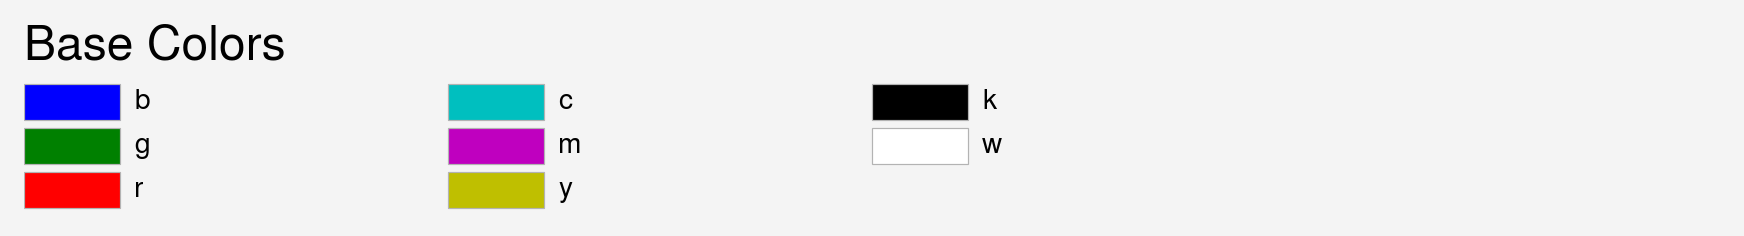

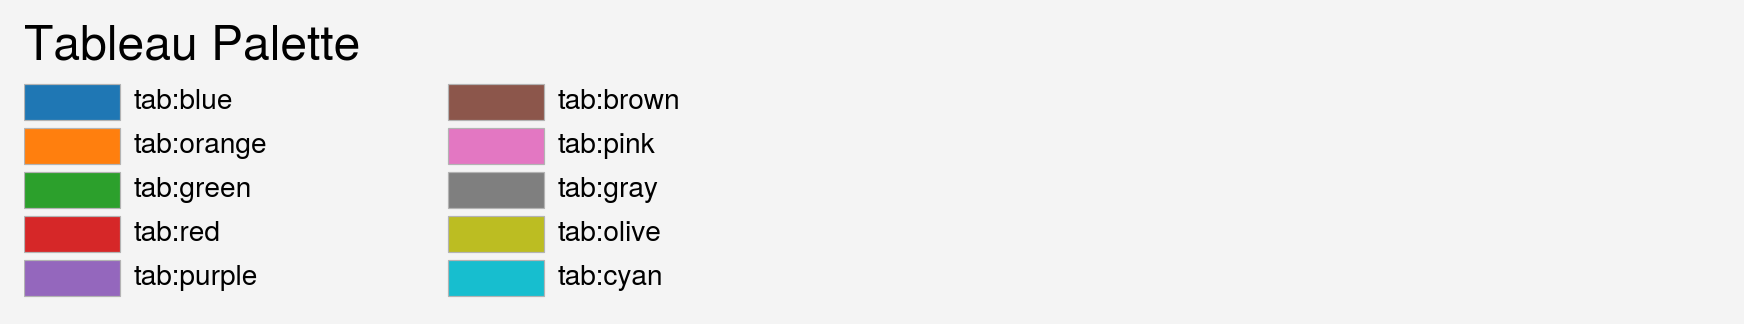

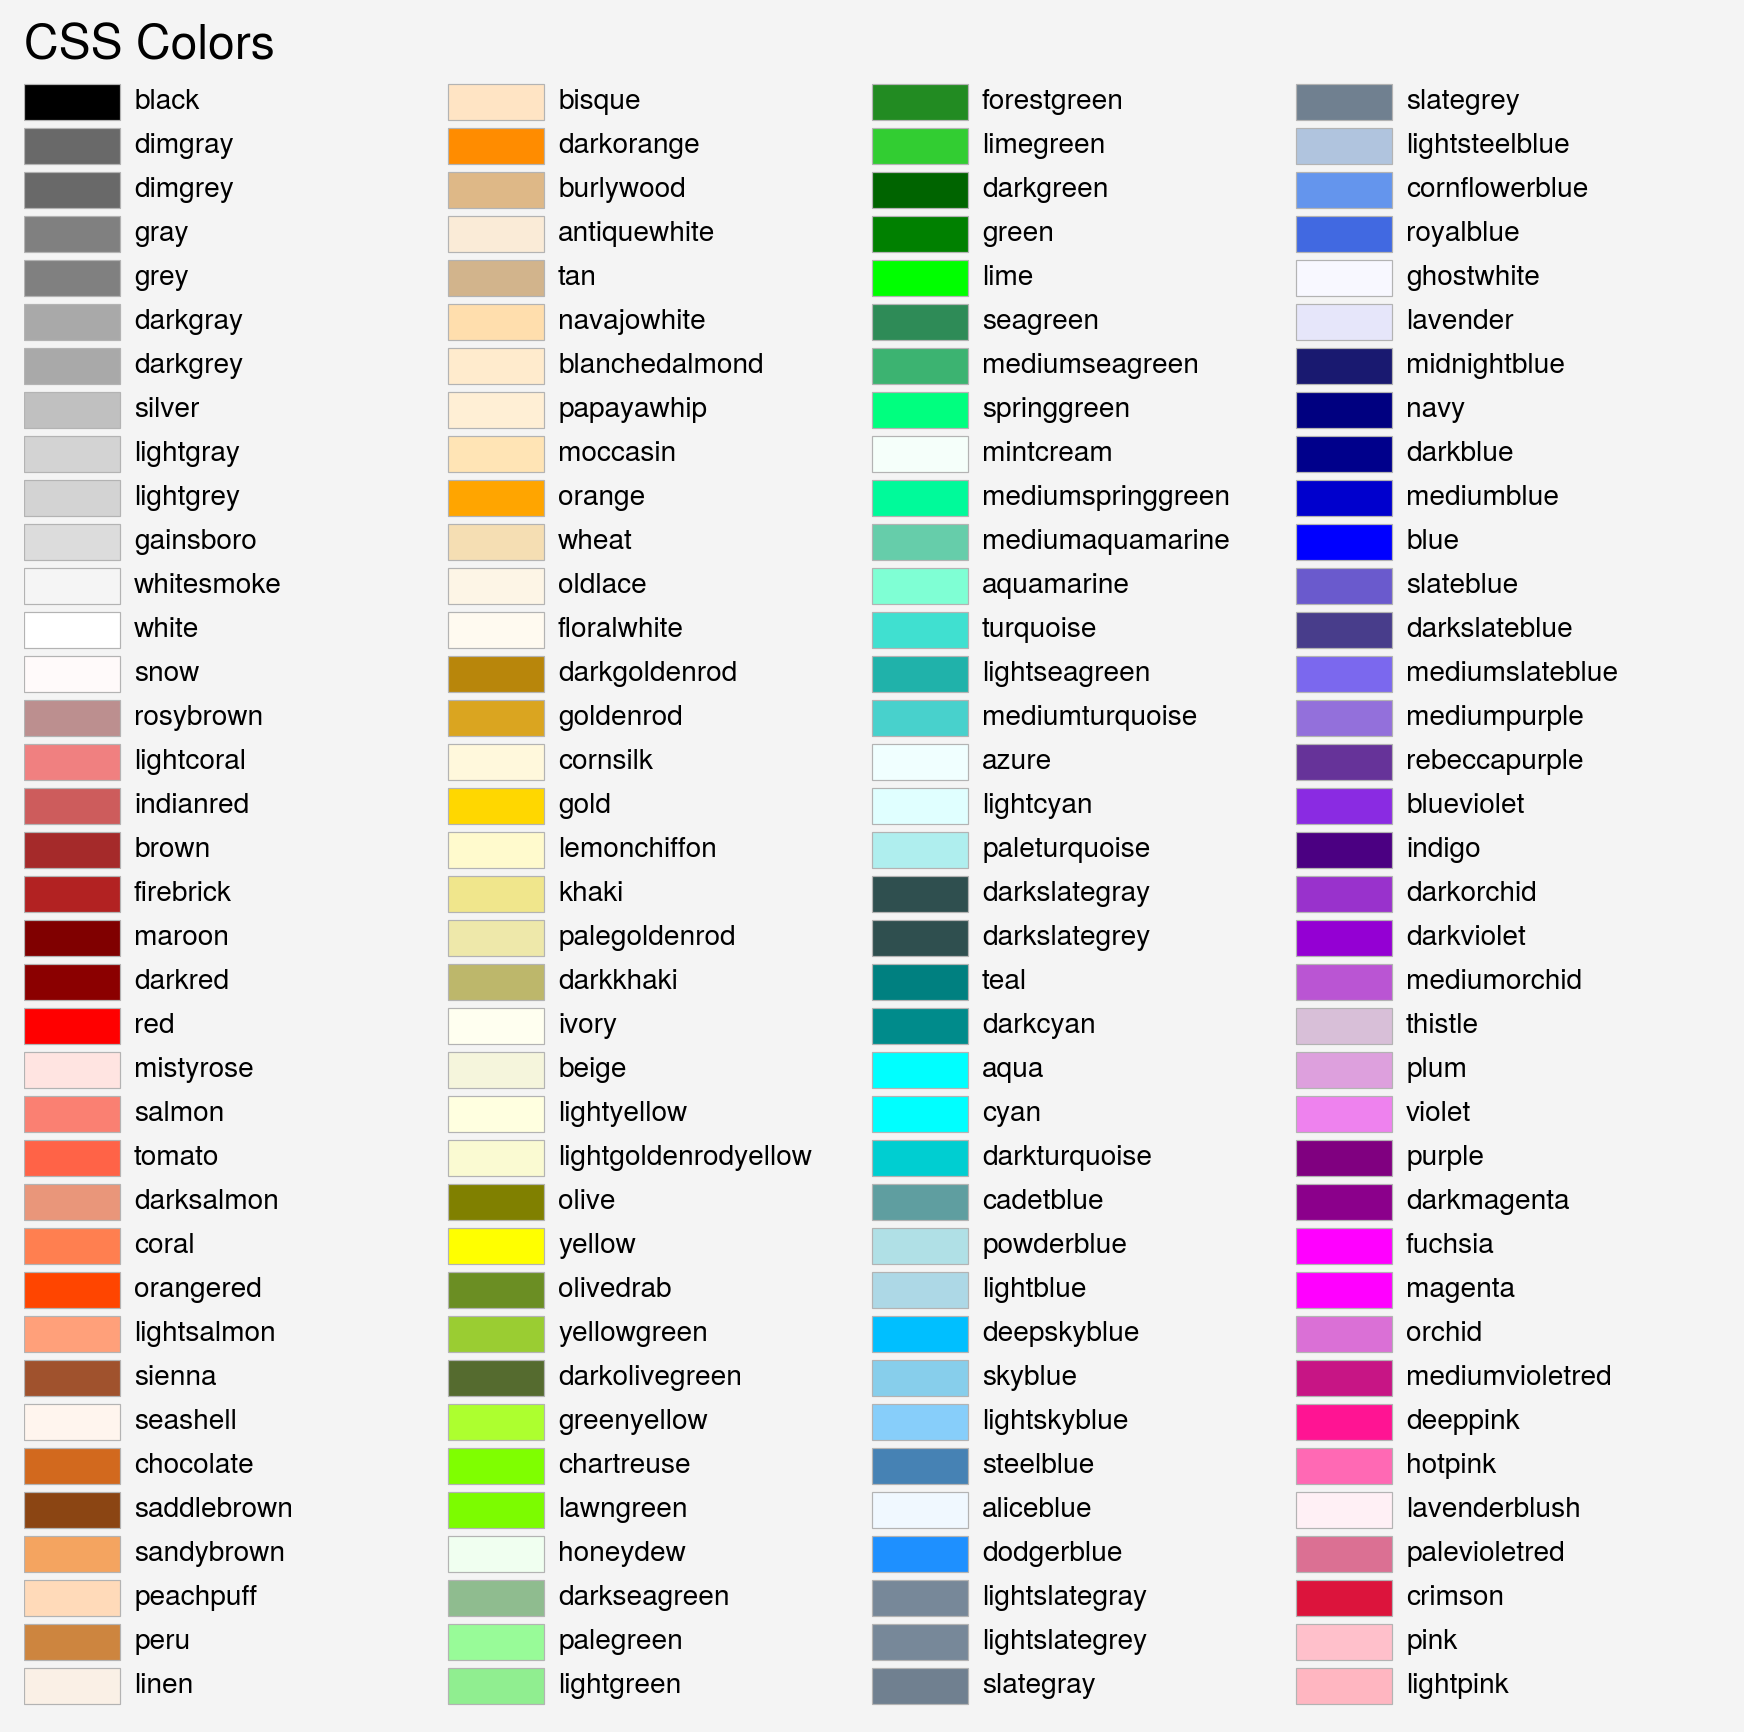

In [ ]:
#@title Named Colors Code

"""
====================
List of named colors
====================

This plots a list of the named colors supported in matplotlib. Note that
:ref:`xkcd colors <xkcd-colors>` are supported as well, but are not listed here
for brevity.

For more information on colors in matplotlib see

* the :doc:`/tutorials/colors/colors` tutorial;
* the `matplotlib.colors` API;
* the :doc:`/gallery/color/color_demo`.
"""

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

# sphinx_gallery_thumbnail_number = 3
plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
# xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
# xkcd_fig.savefig("XKCD_Colors.png")

plt.savefig('named-colors.png')
plt.show()

#############################################################################
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.colors`
#    - `matplotlib.colors.rgb_to_hsv`
#    - `matplotlib.colors.to_rgba`
#    - `matplotlib.figure.Figure.get_size_inches`
#    - `matplotlib.figure.Figure.subplots_adjust`
#    - `matplotlib.axes.Axes.text`
#    - `matplotlib.patches.Rectangle`


## Line charts

This time I'll try to reproduce the chart made by VMD.

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/rmsd-core.dat', sep='\s\s+', engine='python')

fig = px.line(df, x="frame", y="mol0", title='RMSD of CORE',
labels=dict(frame="simulation frame", mol0="RMSD vs t=0")
)
fig.update_layout(width=600)
fig.write_image("rmsd-core.png")
fig.show()

Okay, that worked. Just a few missing commas at first, but I quickly recovered. I should really learn basic python syntax.

Let's try the *LID* domain. Upload `rmsd-lid.dat`, and look at the table.

In [ ]:
import plotly.graph_objects as go
import pandas as pd

import plotly.express as px

df = pd.read_csv('/content/rmsd-lid.dat',
           sep='\s\s+', engine='python')
           
df.columns

Index(['frame', 'mol0'], dtype='object')

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/rmsd-lid.dat',
           sep='\s\s+', engine='python')

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[df.frame, df.mol0],
                fill_color='lavender',
                align='left'))
])
fig.update_layout(width=500)
fig.write_image("rmsd-lid-table.png")
fig.show()

Nice. Let's plot some lines.

In [ ]:
df = pd.read_csv('/content/rmsd-lid.dat', sep='\s\s+', engine='python')

fig = px.line(df, x="frame", y="mol0", title='RMSD of LID Domain',
labels=dict(frame="simulation frame", mol0="RMSD vs t=0")
)
fig.update_layout(width=600)
fig.write_image("rmsd-lid.png")
fig.show()

Upload `rmsd-nmp.dat`, and look at the table.

Nice. Okay, let's try the last domain--the *NMP* domain.

In [ ]:
import plotly.graph_objects as go
import pandas as pd

import plotly.express as px

df = pd.read_csv('/content/rmsd-lid.dat',
           sep='\s\s+', engine='python')
           
df.columns

Index(['frame', 'mol0'], dtype='object')

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/rmsd-nmp.dat',
           sep='\s\s+', engine='python')

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[df.frame, df.mol0],
                fill_color='lavender',
                align='left'))
])
fig.update_layout(width=500)
fig.show()

In [ ]:
df = pd.read_csv('/content/rmsd-nmp.dat', sep='\s\s+', engine='python')

fig = px.line(df, x="frame", y="mol0", title='RMSD of NMP Domain',
labels=dict(frame="simulation frame", mol0="RMSD vs t=0")
)
fig.update_layout(width=600)
fig.show()

Looking good!

It would be useful to see all traces on the same figure. Let's give it a whirl.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from pathlib import Path

fig = go.Figure()
for f in files: 
    file_name = f.stem  
    df = pd.read_csv(f, dtype={'Pass Percentage': int, 'original_pass_percent': 
         int})  
    print(df.head())  
    
    fig.add_trace(go.Scatter(x=df['frame'], y=['mol0'],
                mode='lines',
                name=file_name))
fig = px.line(df)

### Generate the plot
fig.show()

In [ ]:
px.line(df, x='frame', y='mol0', color='filename')

plt.show()  # outside the loop

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import plotly.express as px

# location where files exist
p = Path.cwd().joinpath("SO_csv")
if not p.is_dir():
    p.mkdir()
# generate 100s of files
for i in range(400):
    pd.DataFrame(
        {
            "time": pd.date_range("00:00", freq="30min", periods=47),
            "v(t)": pd.Series(np.random.uniform(1, 5, 47)).sort_values(),
        }
    ).to_csv(p.joinpath(f"GIRS12_L_8V_0.95bar.{i}"), index=False)

# read and concat all the CSVs into one dataframe, creating additional column that is the filename
# scatter this dataframe, a scatter / color per CSV
px.scatter(
    pd.concat(
        [pd.read_csv(f).assign(name=f.name) for f in p.glob("GIRS12_L_8V_0.95bar.*")]
    ),
    x="time",
    y="v(t)",
    color="name",
)

The `.dat` files are causing the problem. I don't know why VMD saves the data as `.dat`. files, but let's change them to `.csv`. I'm hoping my problems will go away.

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/rmsd-nmp.dat',
           sep='\s\s+', engine='python')

df.to_csv('/content/rmsd-nmp.csv', index = False, sep = ",")

data= pd.read_csv("/content/rmsd-nmp.csv")
data

,frame,mol0
0,0,NaN
1,1,0.353
2,2,0.494
3,3,0.589
4,4,0.612
...,...,...
93,93,1.814
94,94,1.785
95,95,1.761
96,96,1.799


Let's make some more `.csv` files.

In [ ]:
df = pd.read_csv('/content/rmsd-core.dat',
           sep='\s\s+', engine='python')
df.to_csv('/content/rmsd-core.csv', index = False, sep = ",")

In [ ]:
df = pd.read_csv('/content/rmsd-lid.dat',
           sep='\s\s+', engine='python')
df.to_csv('/content/rmsd-lid.csv', index = False, sep = ",")

Now let's try to put all the data in the same figure.

In [ ]:
# This is a test to see if I can get 2 traces on 1 graph
import plotly.express as px
import plotly.graph_objects as go
df = pd.read_csv('/content/rmsd-nmp.csv')
df2 = pd.read_csv('/content/rmsd-core.csv')

# since I'm just reading the files into different dataframes,
# I don't need to make csv files 

fig1 = px.line(df, x="frame", y="mol0")
fig1.update_traces(line=dict(color = 'rgba(50,50,50,0.2)'))

fig2 = px.line(df2, x="frame", y="mol0")
fig1.update_traces(line=dict(color = 'red'))

fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
# If I create a separate figure for each file and then combine them,
# I don't need to make .csv files.

# Create dataframes for each file
df = pd.read_csv('/content/rmsd-core.dat', sep='\s\s+', engine='python')
df2 = pd.read_csv('/content/rmsd-lid.dat', sep='\s\s+', engine='python')
df3 = pd.read_csv('/content/rmsd-nmp.dat', sep='\s\s+', engine='python')

# create figure 1
fig1 = px.line(df, x="frame", y="mol0") # x and y are the column names
# change the color of the trace and add a name for the legend
fig1.update_traces(line=dict(color = 'violet'), 
                   name="RMSD-core")

# create figure 2
fig2 = px.line(df2, x="frame", y="mol0")
# change the color of the trace and add a name for the legend
fig2.update_traces(line=dict(color = 'deepskyblue'), 
                   name="RMSD-lid")

# create figure 3
fig3 = px.line(df3, x="frame", y="mol0")
# change the color of the trace and add a name for the legend
fig3.update_traces(line=dict(color = 'goldenrod'), 
                   name="RMSD-nmp")

# construct the composite figure
fig4 = go.Figure(data=fig1.data + fig2.data + fig3.data)

# add the legend and the axes titles
fig4.update_traces(showlegend=True)
# fig4.update_layout(
#     legend=dict(
#         # the x and y positions will put legend in bottom middle of the figure
#         x=0.4,
#         y=0,
#         title_text="Legend",
#         bgcolor="whitesmoke"
#          )
#         )
fig4.update_xaxes(title_text="Simulation Frame")
fig4.update_yaxes(title_text="RMSD vs t=0")
# change the graph width and add a graph title
fig4.update_layout(width=600, title_text="RMSD for adk")

# to anchor the legend in the top left of the graph, this works:
# fig4.update_layout(width=600, title_text="RMSD for adk",
#                     legend=dict(
#     yanchor="top",
#     y=0.99,
#     xanchor="left",
#     x=0.01
# ))
# create an image
fig4.write_image("rmsd-all-l-top.png")

# show the graph
fig4.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import pandas as pd
import numpy as np

# This code iterates over a directory and makes the plot while combining
# the csv files. 
# I have not figured out how to change the legend labels
# or change the trace colors.

# location where files exist
p = Path.cwd().joinpath("/content/")

# read and concat all the CSVs into one dataframe, creating additional column that is the filename
# scatter this dataframe, a scatter / color per CSV
fig5 = px.line(
    pd.concat(
        [pd.read_csv(f).assign(name=f.name) for f in p.glob("rmsd-*.csv")]
    ),
    x="frame",
    y="mol0",
    color="name",
    labels={
            "frame": "Simulation Frame",
            "mol0": "RMSD vs t=0",
            "name": "Legend"
            }
)

# to anchor the legend in the top left of the graph, this works:

# fig5.update_layout(width=600, title_text="RMSD for adk",
#                     legend=dict(
#     yanchor="top",
#     y=0.99,
#     xanchor="left",
#     x=0.01
# ))

# The below code worked!

newnames = {'rmsd-core.csv':'RMSD CORE domain', 
            'rmsd-nmp.csv':'RMSD NMP domain', 
            'rmsd-lid.csv':'RMSD LID domain'}

fig5.for_each_trace(lambda t: t.update(name = newnames[t.name]))

fig5.update_layout(width=600, title_text="RMSD for adk")
fig5.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import pandas as pd
import numpy as np

# This code iterates over a directory and makes the plot while combining
# the csv files. 

# location where files exist
p = Path.cwd().joinpath("/content/")

# read and concatinate all the .csv files into one dataframe, 
# creating an additional column that is the filename.
# plot the combined dataframe scatter (line), 
# using one plot / color per csv file.

fig5 = px.line(
    pd.concat(
        [pd.read_csv(f).assign(name=f.name) for f in p.glob("rmsd-*.csv")],
    ),
    color_discrete_map={
            'rmsd-core.csv':'goldenrod', # a color for this filename
            'rmsd-nmp.csv':'deepskyblue', # a color for this filename
            'rmsd-lid.csv':'violet' # a color for this filename
             },
    x="frame", # the column to use as the X-axis
    y="mol0", # the column to use as the Y-axis
    color="name", # color each line based on filename
    labels={
            "frame": "Simulation Frame", # a title for the X-axis
            "mol0": "RMSD vs t=0", # a title for the Y-axis
            "name": "" # figure legend title (leave empty for no title)
            }
)

# to anchor the legend in the top left of the graph, this works:

# fig5.update_layout(width=600, title_text="RMSD for adk",
#                     legend=dict(
#     yanchor="top",
#     y=0.99,
#     xanchor="left",
#     x=0.01
# ))

# Rename the traces
newnames = {'rmsd-core.csv':'RMSD CORE domain', 
            'rmsd-nmp.csv':'RMSD NMP domain', 
            'rmsd-lid.csv':'RMSD LID domain'}

fig5.for_each_trace(lambda t: t.update(name = newnames[t.name]))

# set the figure width and give the figure a title
fig5.update_layout(width=700, title_text="RMSD for adk")
fig5.write_image("rmsd-all-v2.png")
# show the figure
fig5.show()


## Ramachandran Plots

I have not found a way to do this in Plotly, but I think I can modify a version of the Matplotlib code I show below, which comes from [Ramachandran plots on jupyter notebook (gerdos/pyRAMA)](https://chem-workflows.com/articles/2019/10/21/ramachandran-plots-on-jupyter-notebook-gerdospyrama/)

Also see this Python code, [PyRAMA](https://www.reddit.com/r/bioinformatics/comments/7hpvoa/a_ramachandran_plot_implementation_in_python/), to create a Ramachandran Plot


### PyRAMA

See [Ramachandran plots on jupyter notebook (gerdos/pyRAMA)](https://chem-workflows.com/articles/2019/10/21/ramachandran-plots-on-jupyter-notebook-gerdospyrama/). Also need the [rama-500.zip file](https://github.com/AngelRuizMoreno/Cheminformatics_workflows_source/blob/master/Others/rama-500.zip)

All see [this site](http://bioinformatics.org/molvis/phipsi/)
has good background and quiz questions.

In [ ]:
#@title PyRAMA

!pip3 install pyrama

     |████████████████████████████████| 542 kB 4.4 MB/s 
     |████████████████████████████████| 2.3 MB 47.2 MB/s 


In [ ]:
!pip install biopython

In [ ]:
import pyrama as pyrama
import matplotlib as matplotlib
import numpy as numpy

In [ ]:
!pyrama drive/MyDrive/files/1HSG.pdb

/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1636.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1680.
  PDBConstructionWarning,
<Figure size 640x480 with 4 Axes>


In [ ]:
!pip install biopython

     |████████████████████████████████| 2.3 MB 4.7 MB/s 


In [ ]:
#@title PyRAMA

pdb_file='6gve.pdb' #This is the pdb we will analize
import math
import sys
import os

import matplotlib.pyplot as plt
import numpy as np
from Bio import PDB
from matplotlib import colors

def plot_ramachandran(file):
    __file__=file

    """
    The preferences were calculated from the following artice:
    Lovell et al. Structure validation by Calpha geometry: phi,psi and Cbeta deviation. 2003
    DOI: 10.1002/prot.10286
    """

    # General variable for the background preferences
    rama_preferences = {
        "General": {
            "file": "rama500-general.data",
            "cmap": colors.ListedColormap(['#FFFFFF', '#B3E8FF', '#7FD9FF']),
            "bounds": [0, 0.0005, 0.02, 1],
        },
        "GLY": {
            "file": "rama500-gly-sym.data",
            "cmap": colors.ListedColormap(['#FFFFFF', '#FFE8C5', '#FFCC7F']),
            "bounds": [0, 0.002, 0.02, 1],
        },
        "PRO": {
            "file": "rama500-pro.data",
            "cmap": colors.ListedColormap(['#FFFFFF', '#D0FFC5', '#7FFF8C']),
            "bounds": [0, 0.002, 0.02, 1],
        },
        "PRE-PRO": {
            "file": "rama500-prepro.data",
            "cmap": colors.ListedColormap(['#FFFFFF', '#B3E8FF', '#7FD9FF']),
            "bounds": [0, 0.002, 0.02, 1],
        }
    }

    # Read in the expected torsion angles
    __location__ = './' #You must set the ptah of the .data files here
    rama_pref_values = {}
    for key, val in rama_preferences.items():
        rama_pref_values[key] = np.full((360, 360), 0, dtype=np.float64)
        with open(os.path.join(__location__, val["file"])) as fn:
            for line in fn:
                if not line.startswith("#"):
                    # Preference file has values for every second position only
                    rama_pref_values[key][int(float(line.split()[1])) + 180][int(float(line.split()[0])) + 180] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 179][int(float(line.split()[0])) + 179] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 179][int(float(line.split()[0])) + 180] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 180][int(float(line.split()[0])) + 179] = float(
                        line.split()[2])

    normals = {}
    outliers = {}
    for key, val in rama_preferences.items():
        normals[key] = {"x": [], "y": [],'Res':[]}
        outliers[key] = {"x": [], "y": []}

    # Calculate the torsion angle of the inputs
    #for inp in sys.argv[1:]:
        #if not os.path.isfile(inp):
            #print("{} not found!".format(inp))
            #continue
    structure = PDB.PDBParser().get_structure('input_structure', __file__)
    for model in structure:
        for chain in model:
            polypeptides = PDB.PPBuilder().build_peptides(chain)
            for poly_index, poly in enumerate(polypeptides):
                phi_psi = poly.get_phi_psi_list()
                for res_index, residue in enumerate(poly):
                    res_name = "{}".format(residue.resname)
                    res_num = residue.id[1]
                    phi, psi = phi_psi[res_index]
                    if phi and psi:
                        aa_type = ""
                        if str(poly[res_index + 1].resname) == "PRO":
                            aa_type = "PRE-PRO"
                        elif res_name == "PRO":
                            aa_type = "PRO"
                        elif res_name == "GLY":
                            aa_type = "GLY"
                        else:
                            aa_type = "General"
                        if rama_pref_values[aa_type][int(math.degrees(psi)) + 180][int(math.degrees(phi)) + 180] < \
                                rama_preferences[aa_type]["bounds"][1]:
                            print("{} {} {} {}{} is an outlier".format(inp, model, chain, res_name, res_num))
                            outliers[aa_type]["x"].append(math.degrees(phi))
                            outliers[aa_type]["y"].append(math.degrees(psi))
                        else:
                            normals[aa_type]["x"].append(math.degrees(phi))
                            normals[aa_type]["y"].append(math.degrees(psi))
                            normals[aa_type]['Res'].append(res_name+'_'+str(res_num))

    # Generate the plots
    plt.figure(figsize=(10,10))
    for idx, (key, val) in enumerate(sorted(rama_preferences.items(), key=lambda x: x[0].lower())):
        plt.subplot(2, 2, idx + 1)
        plt.title(key,fontsize=20)
        plt.imshow(rama_pref_values[key], cmap=rama_preferences[key]["cmap"],
                   norm=colors.BoundaryNorm(rama_preferences[key]["bounds"], rama_preferences[key]["cmap"].N),
                   extent=(-180, 180, 180, -180),alpha=0.7)

        plt.scatter(normals[key]["x"], normals[key]["y"],s=[15],marker='.')

        #for key in normals:
            #for i, name in enumerate (normals[key]['Res']):
                #plt.annotate(name, (normals[key]["x"][i], normals[key]["y"][i]))

        plt.scatter(outliers[key]["x"], outliers[key]["y"],color="red",s=[15],marker='.')
        plt.xlim([-180, 180])
        plt.ylim([-180, 180])
        plt.plot([-180, 180], [0, 0],color="k",alpha=0.7)
        plt.plot([0, 0], [-180, 180],color="k",alpha=0.7)
        plt.xlabel(r'$\phi$',fontsize=12)
        plt.ylabel(r'$\psi$',fontsize=12)
        plt.grid(linestyle='dotted')

    plt.tight_layout()
    # plt.savefig("asd.png", dpi=300) #Uncommet this line of you want so save the plot in a specific location
    plt.show()

/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 34321.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34365.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 34409.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 34453.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 34497.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 34541.
  PDBC

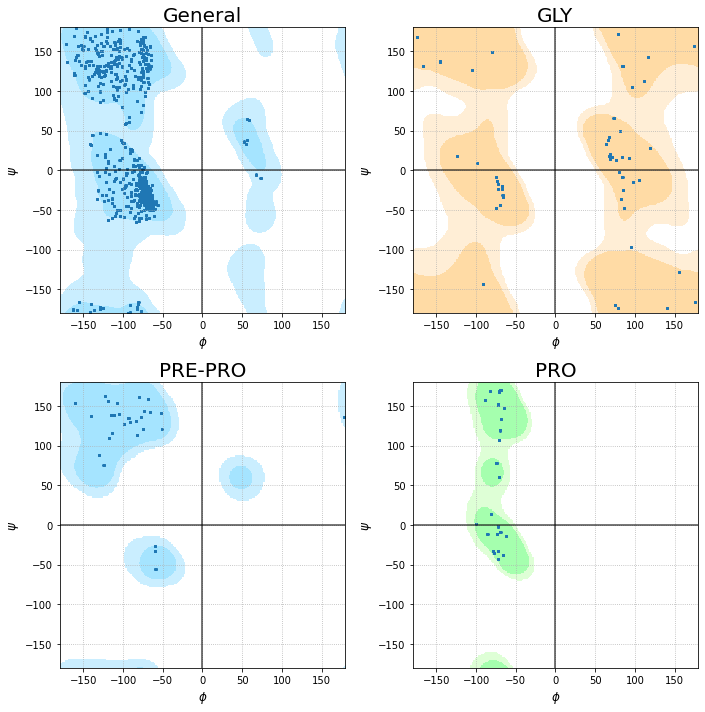

In [ ]:
plot_ramachandran(pdb_file)

### Ramachandran_Plotter

See the GitHub page for [Ramachandran_Plotter](https://github.com/Joseph-Ellaway/Ramachandran_Plotter). 

In [ ]:
!pip install numpy pandas matplotlib scipy biopython matplotlib argparse opencv-python

In [ ]:
! git clone https://github.com/Joseph-Ellaway/Ramachandran_Plotter.git

Cloning into 'Ramachandran_Plotter'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 157 (delta 72), reused 61 (delta 19), pack-reused 0
Receiving objects: 100% (157/157), 77.41 MiB | 17.34 MiB/s, done.
Resolving deltas: 100% (72/72), done.


In [ ]:
! python ./Ramachandran_Plotter/RamachandranPlotter.py --pdb 6GVE.pdb --plot_type 0


  ERROR: Invalid PDB file 
 


upload `test.csv`

In [ ]:
import plotly.graph_objects as go
import pandas as pd

import plotly.express as px

df = pd.read_csv('test1.csv'
           )
           
df.columns

Index(['amino acid', 'color', 'phi', 'psi', 'number'], dtype='object')

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

df = pd.read_csv('test1.csv'
                )

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=df.values.T,
               fill_color='lavender',
               align='left'))
])
fig.update_layout(width=500)
#fig.write_image("test1.png")
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Create dataframes for each file
df1 = pd.read_csv('/content/drive/MyDrive/files/test-general-allowed1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/files/test-general-allowed2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/files/test-general-allowed3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/files/test-general-allowed4.csv')
df5 = pd.read_csv('/content/drive/MyDrive/files/test-general-allowed5.csv')
df6 = pd.read_csv('/content/drive/MyDrive/files/test-general-allowed6.csv')
df7 = pd.read_csv('/content/drive/MyDrive/files/general-favored1.csv')
df8 = pd.read_csv('/content/drive/MyDrive/files/general-favored2.csv')
df9 = pd.read_csv('/content/drive/MyDrive/files/general-favored3.csv')
df10 = pd.read_csv('/content/drive/MyDrive/files/general-favored4.csv')
df11 = pd.read_csv('/content/drive/MyDrive/files/general-favored5.csv')
df12 = pd.read_csv('/content/drive/MyDrive/files/general-data-good.csv')

# create figures
fig1 = px.line(df1, x="phi", y="psi",
                 hover_name="number" 
                 ) # x and y are the column names

fig2 = px.line(df2, x="phi", y="psi",
                 hover_name="number" 
                 ) # x and y are the column names

fig3 = px.line(df3, x="phi", y="psi",
                 hover_name="number" 
                 ) # x and y are the column names

fig4 = px.line(df4, x="phi", y="psi",
                 hover_name="number" 
                 ) # x and y are the column names

fig5 = px.line(df5, x="phi", y="psi",
                 hover_name="number" 
                 ) # x and y are the column names               

fig5 = px.line(df6, x="phi", y="psi",
                 hover_name="number" 
                 ) # x and y are the column names

fig6 = px.line(df6, x="phi", y="psi",
                 hover_name="number" 
                 ) # x and y are the column names

fig7 = px.line(df7, x="phi", y="psi",
                 hover_name="number" 
                 ) # x and y are the column names

fig8 = px.line(df8, x="phi", y="psi",
                 hover_name="number" 
                 ) # x and y are the column names

fig9 = px.line(df9, x="phi", y="psi",
                 hover_name="number" 
                 ) # x and y are the column names

fig10 = px.line(df10, x="phi", y="psi",
                 hover_name="number" 
                 ) # x and y are the column names

fig11 = px.line(df11, x="phi", y="psi",
                 hover_name="number" 
                 ) # x and y are the column names

fig12 = px.scatter(df12, x="phi", y="psi",
                 hover_name="amino acid" 
                 ) # x and y are the column names
fig12.update_traces(marker=dict(color='white'))

fig20 = go.Figure(data=
                    fig1.data
                  + fig2.data
                  + fig3.data
                  + fig4.data
                  + fig5.data
                  + fig6.data
                  + fig7.data
                  + fig8.data
                  + fig9.data
                  + fig10.data
                  + fig11.data
                  + fig12.data
                  )               

fig20.update_traces(showlegend=False)

# change the graph width and add a graph title
fig20.update_layout(width=700, height=700, title_text="test rama")

fig20.update_xaxes(showline=True,
                  title_text="phi",
                  zeroline=True,
                  showgrid=False, 
                  range=(-180,180),
                  zerolinewidth=1,
                  zerolinecolor='grey'
)

fig20.update_yaxes(showline=True,
                   title_text="psi",
                   zeroline=True,
                   showgrid=False, 
                   range=(-180,180),
                   zerolinewidth=1,
                   zerolinecolor='grey'
)

fig20.update_layout(
                  plot_bgcolor="black"
)

# This styles the line
fig20.update_traces(line=dict(width=1, color="deepskyblue"))

# show the graph
fig20.show()

In [31]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Create dataframes for each file
df21 = pd.read_csv('/content/drive/MyDrive/files/gly-all-21.csv')
df22 = pd.read_csv('/content/drive/MyDrive/files/gly-all-22.csv')
df23 = pd.read_csv('/content/drive/MyDrive/files/gly-all-23.csv')
df24 = pd.read_csv('/content/drive/MyDrive/files/gly-all-24.csv')
df25 = pd.read_csv('/content/drive/MyDrive/files/gly-all-25.csv')
df26 = pd.read_csv('/content/drive/MyDrive/files/gly-all-26.csv')
df27 = pd.read_csv('/content/drive/MyDrive/files/gly-all-27.csv')
df28 = pd.read_csv('/content/drive/MyDrive/files/gly-all-28.csv')
df29 = pd.read_csv('/content/drive/MyDrive/files/gly-all-29.csv')
df210 = pd.read_csv('/content/drive/MyDrive/files/gly-all-210.csv')
df220 = pd.read_csv('/content/drive/MyDrive/files/gly-all-data.csv')

# create figures
fig21 = px.line(df21, x="phi", y="psi", hover_name="number")
fig22 = px.line(df22, x="phi", y="psi", hover_name="number")
fig23 = px.line(df23, x="phi", y="psi", hover_name="number")
fig24 = px.line(df24, x="phi", y="psi", hover_name="number")
fig25 = px.line(df25, x="phi", y="psi", hover_name="number")

fig27 = go.Figure()
fig27.add_trace(go.Scatter(x=df27['phi'], y=df27['psi'], fill='toself'))

fig26 = go.Figure()
fig26.add_trace(go.Scatter(x=df26['phi'], y=df26['psi'], fill='toself'))


# fig27 = px.line(df27, x="phi", y="psi", hover_name="number")
# fig28 = px.line(df28, x="phi", y="psi", hover_name="number")

fig28 = go.Figure()
fig28.add_trace(go.Scatter(x=df28['phi'], y=df28['psi'], fill='toself'))

fig29 = go.Figure()
fig29.add_trace(go.Scatter(x=df29["phi"], y=df29["psi"], fill='toself',
                           customdata=['number']))

fig29.update_traces(
    hovertemplate="<br>".join([
        "number: %{customdata[0]}"
    ])
)



fig210 = px.line(df210, x="phi", y="psi", hover_name="number")

fig220 = px.scatter(df220, x="phi", y="psi", hover_name="amino acid")

fig220.update_traces(marker=dict(color='white'))

# to try to get hover information correct after fill works
# fig = px.scatter(df_2007, x="gdpPercap", y="lifeExp", log_x=True,
#                  hover_name="country", hover_data=["continent", "pop"])


fig30 = go.Figure(data=
                    fig21.data
                  + fig22.data
                  + fig23.data
                  + fig24.data
                  + fig25.data
                  + fig26.data
                  + fig27.data
                  + fig28.data
                  + fig29.data
                  + fig210.data
                  + fig220.data
                  )               

fig30.update_traces(showlegend=False)

# change the graph width and add a graph title
fig30.update_layout(width=700, height=700, title_text="test rama")

fig30.update_xaxes(showline=True,
                  title_text="phi",
                  zeroline=True,
                  showgrid=False, 
                  range=(-180,180),
                  zerolinewidth=1,
                  zerolinecolor='grey'
)

fig30.update_yaxes(showline=True,
                   title_text="psi",
                   zeroline=True,
                   showgrid=False, 
                   range=(-180,180),
                   zerolinewidth=1,
                   zerolinecolor='grey'
)

fig30.update_layout(
                  plot_bgcolor="black"
)

# This styles the line
fig30.update_traces(line=dict(width=1, color="darkorange"))

# show the graph
fig30.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import pandas as pd
import numpy as np

# This code iterates over a directory and makes the plot while combining
# the csv files. 

# location where files exist
p = Path.cwd().joinpath("/content/drive/MyDrive/files")

# read and concatinate all the .csv files into one dataframe, 
# creating an additional column that is the filename.
# plot the combined dataframe scatter (line), 
# using one plot / color per csv file.

fig1 = px.line(
    pd.concat(
        [pd.read_csv(f).assign(name=f.name) for f in p.glob("*general-*.csv")],
    ),
    color_discrete_map={
            'test-general-allowed1.csv':'deepskyblue', # a color for this filename
            'test-general-allowed2.csv':'deepskyblue', # a color for this filename
            'test-general-allowed3.csv':'deepskyblue', # a color for this filename
            'test-general-allowed4.csv':'deepskyblue', # a color for this filename
            'test-general-allowed5.csv':'deepskyblue', # a color for this filename
            'test-general-allowed6.csv':'deepskyblue', # a color for this filename
            'general-favored1.csv':'deepskyblue',
            'general-favored2.csv':'deepskyblue',
            'general-favored3.csv':'deepskyblue',
            'general-favored4.csv':'deepskyblue',
            'general-favored5.csv':'deepskyblue'
             },
    x="phi", # the column to use as the X-axis
    y="psi", # the column to use as the Y-axis
    color="name", # color each line based on filename
    labels={
            "phi": "phi", # a title for the X-axis
            "psi": "psi" # a title for the Y-axis
            # figure legend title (leave empty for no title)
            }
)


df = pd.read_csv('/content/drive/MyDrive/files/general-data-good.csv')

# create figure
fig2 = px.scatter(df, x="phi", y="psi",
                 hover_name="amino acid" # amino acid is one of the columns
                 ) # x and y are the column names
 
# to anchor the legend in the top left of the graph, this works:


# fig5.update_layout(width=600, title_text="RMSD for adk",
#                     legend=dict(
#     yanchor="top",
#     y=0.99,
#     xanchor="left",
#     x=0.01
# ))

# fig5.for_each_trace(lambda t: t.update(name = newnames[t.name]))

# fig.update_traces(fill="toself")
# for this to work, I need to add some data points to the tables
# that connect the left line to the middle line along the axes

fig3 = go.Figure(data=fig1.data + fig2.data) 

# set the figure width and give the figure a title
fig3.update_layout(width=700, height=700, title_text="test contour")

fig3.update_xaxes(showline=True,
                 zeroline=True,
                 showgrid=False,
                #  linewidth=1, 
                #  linecolor='grey', 
                #  gridcolor='grey', 
                 range=(-180,180),
                 zerolinewidth=1,
                 zerolinecolor='grey'
)

fig3.update_yaxes(showline=True,
                 zeroline=True,
                 showgrid=False, 
                #  linewidth=1, 
                #  linecolor='grey', 
                #  gridcolor='grey', 
                 range=(-180,180),
                 zerolinewidth=1,
                 zerolinecolor='grey'
)

fig3.update_layout(
                  plot_bgcolor="black"
)

# This styles the line
fig3.update_traces(line=dict(width=1))

# hiding legend in pyplot express.
fig3.update_traces(showlegend=False)


# show the figure
fig3.show()
